In [1]:
# Importing the other libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Importing the dataset
data = pd.read_excel('Data for model.xlsx')


In [3]:
data.head()
#data.shape
#type(data)

,CT,CR,AT,AR,Ratio,Pore
0,200.0,1.0,300.0,1.0,2.0,0.002902
1,200.0,4.0,700.0,2.0,0.5,0.112226
2,300.0,3.0,500.0,0.5,3.0,0.096670
3,500.0,2.0,800.0,3.0,2.0,0.183339
4,500.0,0.5,400.0,4.0,1.0,0.006232


In [4]:
len(data)

26

In [5]:
X = data.drop(labels= ['Pore'], axis=1)
y = data['Pore']


In [6]:
type(y)

pandas.core.series.Series

In [7]:
# Descriptive statistics for each column
y.describe()

count    26.000000
mean      0.198203
std       0.080769
min       0.002902
25%       0.165728
50%       0.225435
75%       0.253921
max       0.286716
Name: Pore, dtype: float64

In [8]:
import matplotlib.pyplot

(array([2., 0., 0., 3., 1., 1., 3., 3., 7., 6.]),
 array([0.0029017 , 0.03128317, 0.05966464, 0.08804611, 0.11642758,
        0.14480905, 0.17319052, 0.20157199, 0.22995346, 0.25833493,
        0.2867164 ]),
 <BarContainer object of 10 artists>)

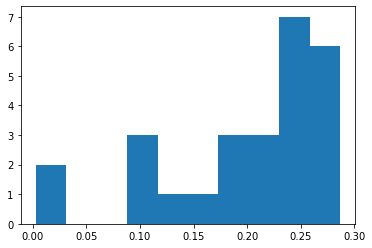

In [9]:
matplotlib.pyplot.hist(y)

In [10]:
X.describe()

,CT,CR,AT,AR,Ratio
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,510.452592,2.188462,666.500480,2.526923,1.626105
std,173.137269,1.149200,177.158191,1.042135,0.669914
min,200.000000,0.500000,300.000000,0.500000,0.500000
25%,404.388175,1.200000,625.000000,2.000000,1.064387
50%,472.012947,2.350000,738.164050,2.675000,1.725000
75%,613.202178,3.000000,796.031528,3.200000,2.000000
max,850.000000,4.000000,800.000000,4.000000,3.000000


The training R2 is:  0.9460190351138986
MSE: 0.00
RMSE of test set: 0.02


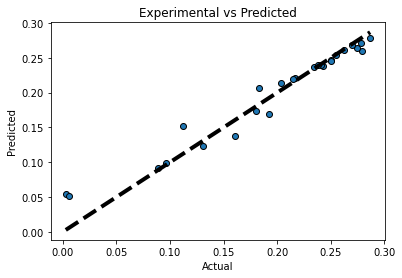

In [11]:
# Fitting RandomForest Regression to the Training set


from sklearn.ensemble import RandomForestRegressor
modelRF =  RandomForestRegressor()
modelRF.fit(X, y)

#Measure the R2 for training and test set
model_score = modelRF.score(X,y)
print("The training R2 is: ", modelRF.score(X, y))


from sklearn.metrics import mean_squared_error
from math import sqrt


y_pred = modelRF.predict(X)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y, y_pred))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y, y_pred)))


#Plot the actual v/s predicted
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Experimental vs Predicted")
plt.show()


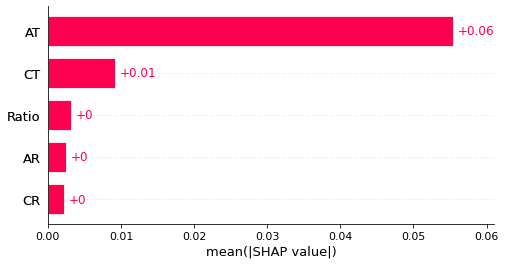

In [12]:
import shap

explainer1 = shap.Explainer(modelRF)
shap_values1 = explainer1(X)

shap.plots.bar(shap_values1, max_display=15)

In [13]:
df = pd.DataFrame(y_pred)
df

,0
0,0.053896
1,0.152806
2,0.098612
3,0.206446
4,0.051049
5,0.091577
6,0.169233
7,0.213775
8,0.123893
9,0.137232


In [14]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

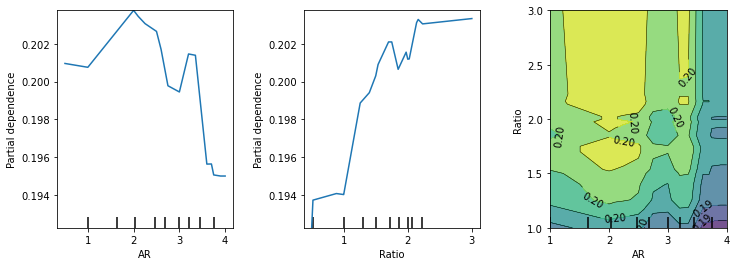

In [40]:
features = ['AR', 'Ratio', ('AR', 'Ratio')]



fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(12,4)) # ax3 stands for the third figure. similar changes on axis interval can be made for 1st and 2nd figure if used ax1 and ax2 respectively

plt.ylim(1,3)
plt.xlim(1,4)
loc_y_ax3 = plticker.MultipleLocator(0.5)
loc_x_ax3 = plticker.MultipleLocator(1)

# ax1.yaxis.set_major_locator(loc)
# ax2.yaxis.set_major_locator(loc)
ax3.yaxis.set_major_locator(loc_y_ax3)
ax3.xaxis.set_major_locator(loc_x_ax3)

display=PartialDependenceDisplay.from_estimator(modelRF, X, features,ax=(ax1, ax2, ax3))
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)


plt.savefig("AR_Ratio.pdf",dpi=600)